# Data Analytics Lab1 - Python review
Author: Piotr Roszkowski
## EXERCISE 1
Import data from CSV file:

In [1]:
import pandas as pd
data = pd.read_csv("Data1.csv")
print(data) #show data

      Unnamed: 0   theta_1   theta_2   theta_3   theta_4   theta_5    theta_6
0     2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908   0.902579
1     2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288   1.930909
2     2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351   2.449691
3     2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518   1.182085
4     2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092   1.742433
...          ...       ...       ...       ...       ...       ...        ...
1090  2019-12-27 -1.520171 -1.128868  1.108275  0.936817  0.948045  11.755980
1091  2019-12-28  0.338910 -3.178251  1.484579  1.051123  1.025288  11.397092
1092  2019-12-29  0.263781  0.045725 -0.112476  0.823782  0.914111  10.918941
1093  2019-12-30 -0.425098 -1.002701 -0.834294  0.850904  0.801977  11.140722
1094  2019-12-31  0.848302  3.510521 -0.280626  0.967050  1.091803  11.989975

[1095 rows x 7 columns]


## EXERCISE 2
Set first column as the index:

In [2]:
data2 = data.set_index(data.columns[0])
print(data) #show data

      Unnamed: 0   theta_1   theta_2   theta_3   theta_4   theta_5    theta_6
0     2017-01-01  0.756936 -1.467790  0.096136 -0.115306 -0.447908   0.902579
1     2017-01-02  0.767089  0.185797 -1.428536 -0.086443 -0.954288   1.930909
2     2017-01-03  0.404544  1.415887  0.443466  0.000200 -0.892351   2.449691
3     2017-01-04  1.313957 -1.804471 -0.836986  0.011785 -1.012518   1.182085
4     2017-01-05  0.209862  1.315868  0.140993 -0.046473 -1.417092   1.742433
...          ...       ...       ...       ...       ...       ...        ...
1090  2019-12-27 -1.520171 -1.128868  1.108275  0.936817  0.948045  11.755980
1091  2019-12-28  0.338910 -3.178251  1.484579  1.051123  1.025288  11.397092
1092  2019-12-29  0.263781  0.045725 -0.112476  0.823782  0.914111  10.918941
1093  2019-12-30 -0.425098 -1.002701 -0.834294  0.850904  0.801977  11.140722
1094  2019-12-31  0.848302  3.510521 -0.280626  0.967050  1.091803  11.989975

[1095 rows x 7 columns]


## EXERCISE 3
Plot all columns as time series:

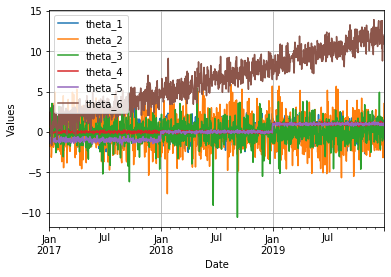

In [3]:
import matplotlib.pyplot as plt
data2.index = pd.to_datetime(data2.index) #change type of data in index to datetime
data2.plot() #plot all columns
plt.xlabel('Date') #add x axis label
plt.ylabel('Values') #add y axis label
plt.grid() #add grid

## EXERCISE 4
Plot histograms:

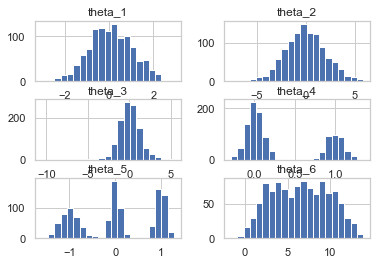

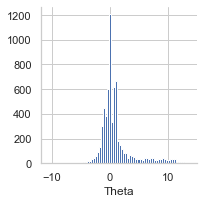

In [10]:
data.hist(bins = 21) #plot histograms for each theta
import seaborn as sns
sns.set(style="whitegrid", color_codes=True) #set grid style
dataMelted = pd.melt(data.reset_index(), \
id_vars = 'index', value_vars=['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6'], \
value_name = "Theta", var_name = "Date time")
g = sns.FacetGrid(dataMelted, sharex = False)
g = g.map(plt.hist, dataMelted.columns[2], bins = 70) #plot histogram for all theta together

## EXERCISE 5
Plot KDE's for all columns:

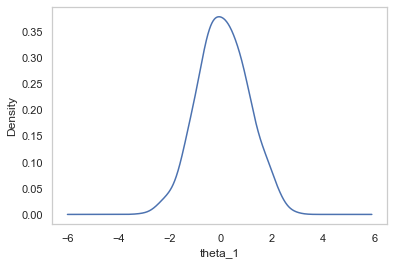

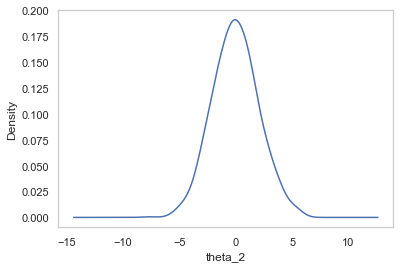

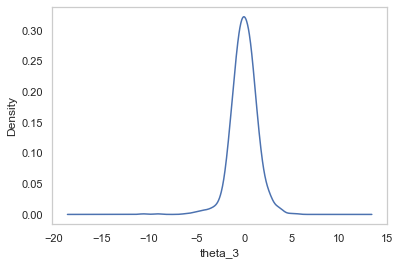

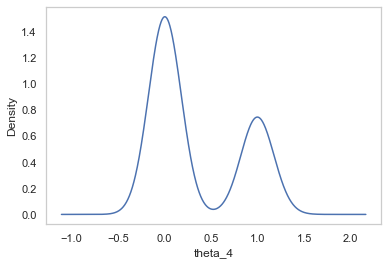

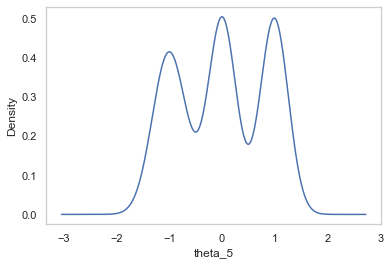

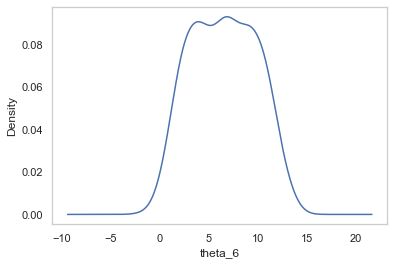

In [11]:
for i in range(6):
    fig, ax = plt.subplots() #create figure
    theta = pd.Series(data.iloc[:, i+1]) #choose data
    ax = theta.plot.kde(bw_method=0.3) #plot kernel density estimator
    plt.xlabel(data.columns[i+1]) #show x axis label
    plt.grid() #show grid

## EXERCISE 6
Repeat analysis for choosen columns in 2018:

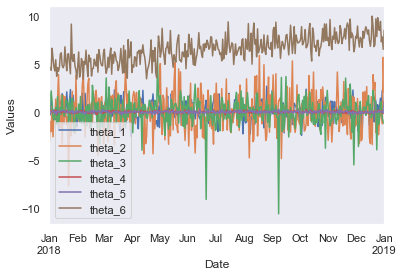

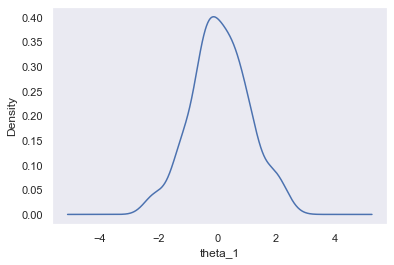

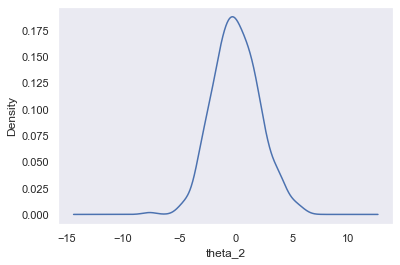

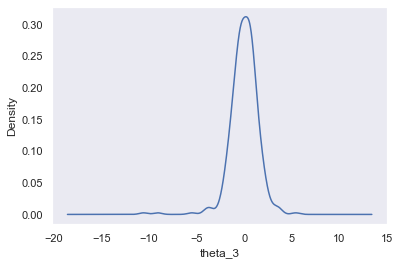

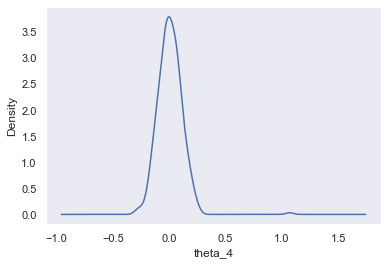

In [6]:
data = data2['2018-01-01':'2019-01-01'] #select data in range of dates
data.plot() #plot those data
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid()
for i in range(4):
    fig, ax = plt.subplots() #create figure
    theta = pd.Series(data.iloc[:, i]) #choose data
    ax = theta.plot.kde(bw_method=0.3) #plot kernel density estimator
    plt.xlabel(data.columns[i])
    plt.grid()